In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# 获取房价数据
    加载数据集

In [2]:
housing = fetch_california_housing()

In [3]:
# print(hosing)
print(housing.DESCR)
import pandas as pd
df = pd.DataFrame(housing.data, columns=housing.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# 数据集信息
    - MedInc        街区组的中位数收入
    - HouseAge      街区组的中位数房屋年龄
    - AveRooms      每户平均房间数
    - AveBedrms     每户平均卧室数
    - Population    街区组人口
    - AveOccup      每户平均家庭成员数
    - Latitude      街区组纬度
    - Longitude     街区组经度
    - target        街区组中房屋价格(目标)

In [4]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

# 2、数据预处理

    我们获取的数据存在以下情况
    - 缺失值
    - 异常值
    - 离群点
    - 噪声

# 3、数据分析与可视化

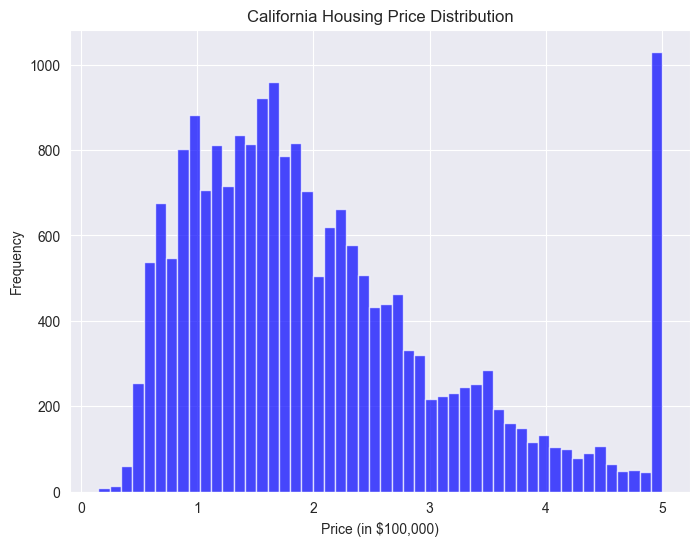

In [5]:

plt.figure(figsize=(8, 6))
plt.hist(housing.target, bins=50, color='blue', alpha=0.7)
plt.title('California Housing Price Distribution')
plt.xlabel('Price (in $100,000)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

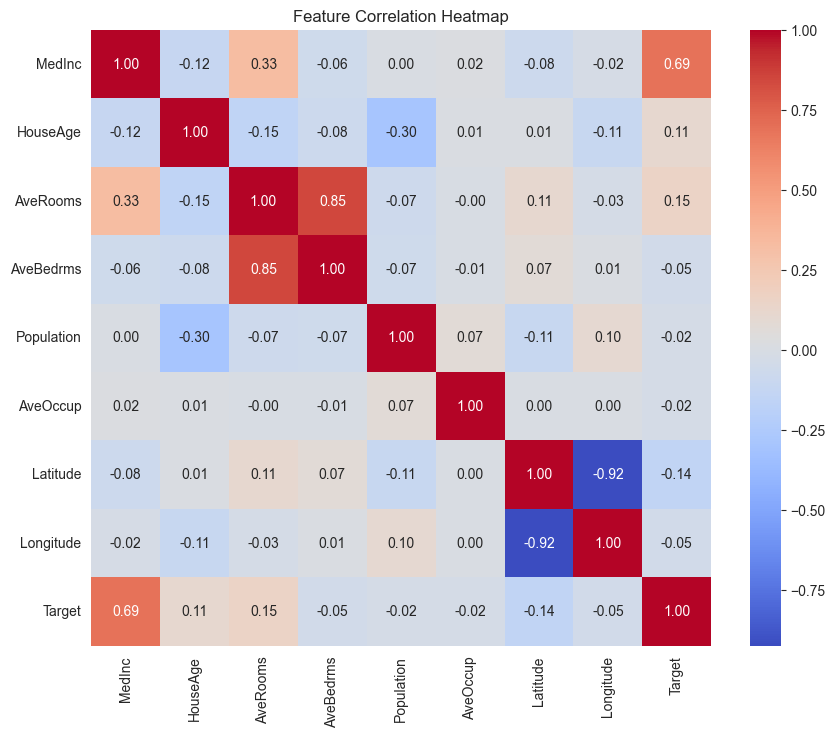

In [6]:
df_with_target = pd.DataFrame(housing.data, columns=housing.feature_names)
df_with_target['Target'] = housing.target  # 添加房价目标列

# 计算相关性矩阵
corr_matrix = df_with_target.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 4、选择合适的机器学习模型

本问题是房价预测问题，可以使用线性回归来进行很好的应用预测，因此使用线性回归模型

In [7]:
model = linear_model.Ridge(alpha=0.1)#alpha参数后续使用Grid search CV进行择优选择
model.fit(X, y)
y_pred = model.predict(X)

正常情况如何选择参数alpha

## 注：机器学习项目流程
1. 数据集的分割：训练集、测试集、验证集
2. 交叉验证：K折交叉验证

# 5、模型训练（使用交叉验证选择合适的参数）

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
ridge_model = linear_model.Ridge()
gsearch = GridSearchCV(estimator=ridge_model, param_grid={'alpha': [  8.0, 8.2,16.0,30.0,50.0,100.0,200.0,300.0,400.0,500.0]}, cv=5, scoring='neg_mean_squared_error')
gsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [8.0, 8.2, 16.0, 30.0, 50.0, 100.0, 200.0,
                                   300.0, 400.0, 500.0]},
             scoring='neg_mean_squared_error')

In [11]:
final_model = linear_model.Ridge(alpha=30.0)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('train_MSE', mean_squared_error(y_train, final_model.predict(X_train)))
print('test_MSE', mean_squared_error(y_test, y_pred))


train_MSE 0.45322727892349673
test_MSE 0.42764651555563815


# 7、上线部署使用

1. 模型保存


In [12]:
import joblib
joblib.dump(final_model, 'ridge_model.pkl')

['ridge_model.pkl']

2. 模型加载

In [13]:
load_model = joblib.load('ridge_model.pkl')
print(load_model.predict(X_test))
print(y_test)

[-119.65198166 -119.02506676 -122.14959227 ... -121.65793607 -120.44980808
 -118.29993887]
20046   -119.01
3024    -119.46
15663   -122.44
20484   -118.72
9814    -121.93
          ...  
15362   -117.22
16623   -120.83
18086   -122.05
2144    -119.76
3665    -118.37
Name: Longitude, Length: 4128, dtype: float64
